# Insights From San Francisco Bay Area On Bike Renting And Sharing Patterns

## By Odimegwu David 

## Investigation Overview

There are 4 key insights that the data story conveys. These are the following:

> It was observed that bikers are creatures of habit. They tend to use the same station when renting and returning bikes. The most notable are Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St). 

> It was also noticed that most bikers are very young people. The modal age for bikers is 35 with a majority of them falling between 25 and 40 years. But senior citizens also use bikes for commuting. From these young bikers, men form a larger proportion of the number. 

> The best days for renting and returning bikes were Thursdays, Tuesdays, and Fridays. It was observed that rented bikes are usually returned on the same day. This is because most biking distances are short distances. Most distances are within the 1 kilometers mark and rarely do you find something exceeding 4 kilometers in distance. 

> Women make up a smaller number than men but they use bikes for longer distances than men and their preferred days also varies. While women prefer using bikes on Thursdays and Tuesdays, men prefer using bikes on Thursdays and Fridays for short commutes in the morning and evenings. 


## Dataset Overview

> The dataset was provided by Udacity in fulfilment of its Data Analysis Nanodegree program for aspiring Data Analysts. 

> The dataset initially contained 16 features but after wranging and feature engineering, more features were added. 

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# loading the dataset into a pandas dataframe
ford = pd.read_csv("cleaned_engineered_data.csv")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday_start,weekday_returns,rent_hour,returns_hour,duration_minutes,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,False,39.0,Thursday,Friday,17,8,869.750000,0.544367
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,na,NaN,False,NaN,Thursday,Friday,18,6,708.683333,1.741905
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,False,51.0,Thursday,Friday,12,5,1030.900000,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,False,34.0,Thursday,Friday,17,4,608.166667,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,True,49.0,Thursday,Friday,23,0,26.416667,2.407789


## Visualization 1

What are the renting and returns pattern exhibited by bikers?

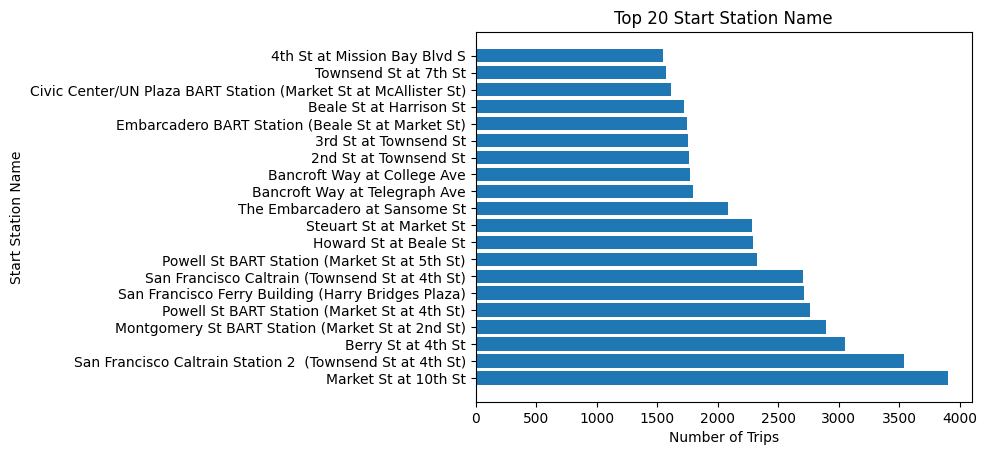

In [4]:
# get the top 20 start_station_name in descending order
top_20_start_station_name = ford['start_station_name'].value_counts().head(20)
# plot a horizontal bar chart using matplotlib
plt.barh(top_20_start_station_name.index, top_20_start_station_name.values)
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.title('Top 20 Start Station Name')
plt.show()

![Top 20 Station Stations](./images/top20startstation.png)

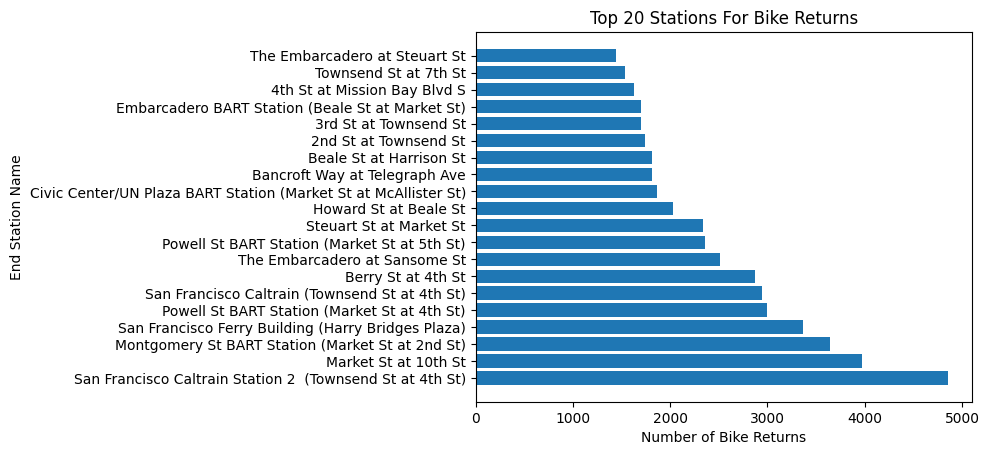

In [5]:
# get the top 20 end_station_name in descending order
top_20_end_station_name = ford['end_station_name'].value_counts().head(20)

# plot a horizontal bar chart using matplotlib
plt.barh(top_20_end_station_name.index, top_20_end_station_name.values)
plt.xlabel('Number of Bike Returns')
plt.ylabel('End Station Name')
plt.title('Top 20 Stations For Bike Returns')
plt.show()


![Top 20 Stations For Returns](./images/top20bikereturns.png)

Comments:

> It was observed that bikers in San Francisco Bay Area are creatures of habit. Despite the presence of more than 329 bike stations in the area, most bikers tend to prefer a few stations for renting and returns. Market St at 10 St and San Francisco Caltrain Station 2 are the most frequently used stations for renting and returning bikes.

> Therefore, bike administrators should endeavor to enhance the appeal of other stations to relieve the most preferred stations of the load of having too many bikers at the same time. Local businesses can also open shops at these preferred stations and engage in business that would profit bikers in order to increase revenue. 

## Visualization 2

What is the age composition of most bikers?

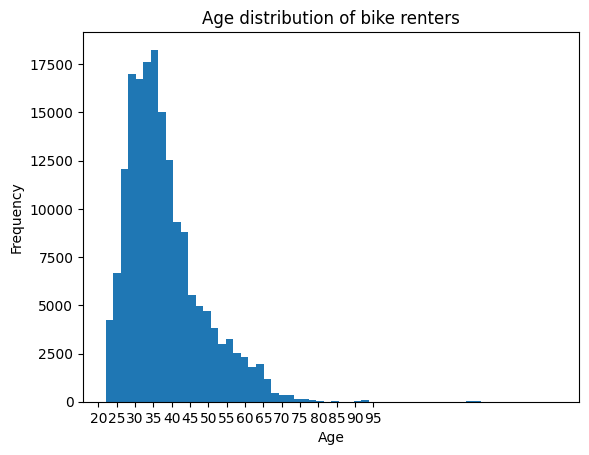

In [7]:
# Create a histogram of age
plt.hist(ford['age'], bins=60)

# Set the x-axis ticks to be 5 values apart
plt.xticks(range(20, 100, 5))
plt.title("Age distribution of bike renters")
plt.ylabel("Frequency")
plt.xlabel("Age")
# Show the plot
plt.show()


![Age distribution](./images/agedistribution.png)

Comments 2:

> The modal bike age is 35. That means that most bikers are young people getting close to their middle age. 

> Bikers mostly fall within the 25 to 40 years age range. But there are some senior citizens who are members of this club. 

> Bikers are active people. Most bikers do it for sports or as a means of commuting to offices or schools. Therefore, launching sports clubs for bikers would be a great idea in this area. Also, the local councils can encourage more people to take up biking because it is part of the effort to protect the environment and increase physical health activities among the populace. 

## Visualization 3 

What is the bike usage pattern in the dataset?

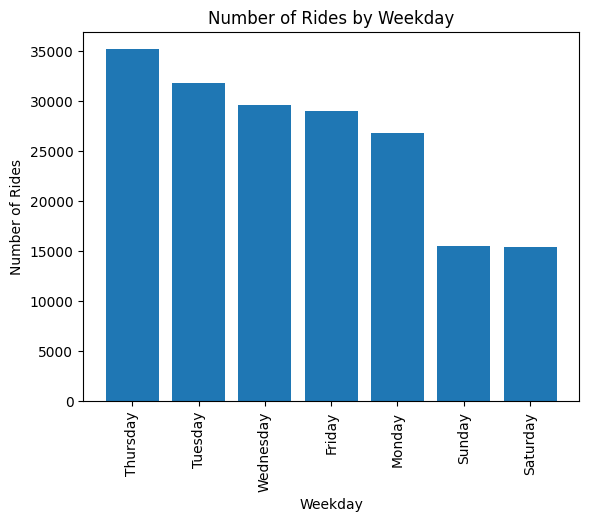

In [8]:
# Get the counts of each weekday_start value
weekday_counts = ford['weekday_start'].value_counts()

# Plot the bar chart
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Weekday')
plt.xticks(rotation=90)
plt.show()

![Weekday count of rides](./images/weekdaysrides.png)

Comments 3a:

> The midweek period i.e Thursdays, Tuesdays and Wednesday had the most days for bike renters and returns.

> Therefore, bike stations should make more bikes available on these days. They should also seek to understand why these pattern exists and plan accordingly. 

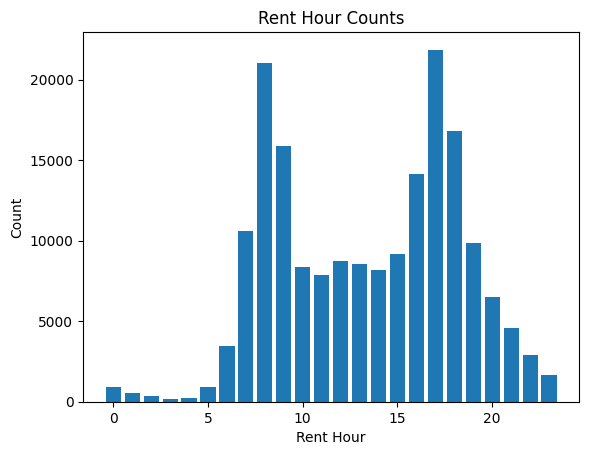

In [9]:
# Get the counts of each rent_hour value
rent_hour_counts = ford['rent_hour'].value_counts()

# Plot the bar chart
plt.bar(rent_hour_counts.index, rent_hour_counts.values)
plt.xlabel('Rent Hour')
plt.ylabel('Count')
plt.title('Rent Hour Counts')
plt.show()

![Rent Hour Counts](./images/renthourcounts.png)

Comments 3b:

> There were two noticeable peaks for bike renting and returning. First in the morning by 8 am and next in the evening by 5 p. 

> These peaks correspond to the times when offices open and close. 

> Therefore one can conclude the bike renters usually use it to commute to offices and schools. 

> To enhance their effectiveness, bike stations should plan accordingly. For example, they should open very early to accomodate early renters. Also, they should close late for those returning from offices and schools. This would involve their having staff on more shifts than usual. 

## Visualization 4

What gender patterns do we observe among bike renters?

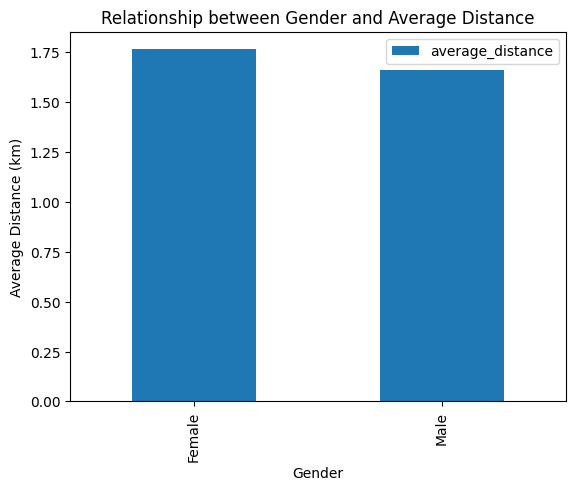

In [10]:
# filter the rows based on whether they are males or females
ford2 = ford[ford['member_gender'].isin(['Male', 'Female'])]
# group the result by gender
ford2_group = ford2.groupby("member_gender")['trip_distance'].mean()
# convert the series to a dataframe
ford2 = ford2_group.to_frame()
# make member_gender index a column and reset index
ford2.reset_index(inplace=True)
# rename the columns appropriately
ford2.rename(columns={'member_gender': 'gender', 'trip_distance': 'average_distance'}, inplace=True)
# plot the visualization
# Create a bar chart to show the relationship between gender and average distance
ford2.plot(kind='bar', x='gender', y='average_distance')

# Add labels and title to the plot
plt.title('Relationship between Gender and Average Distance')
plt.xlabel('Gender')
plt.ylabel('Average Distance (km)')

# Show the plot
plt.show()


![Relationship between Gender and Average Distance](./images/genderavgdistance.png)

Comment 4a:

> Women make up a smaller proportion of bikers (23%) when compared to men (75%) but they travel more distances on average than men. 

> Therefore, one can conclude that women use bikes for things other than commuting short distances to offices and schools. They might use them for long distance traveling like visiting friends who live far away. 

Text(0.5, 0.98, 'Average distance for each weekday by gender\n')

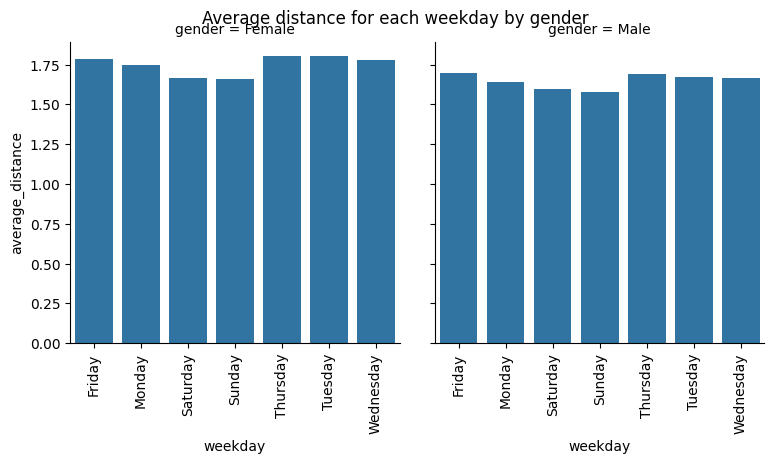

In [12]:
# collect only the columns of interest
ford2 = ford[["member_gender", "weekday_start", "trip_distance"]]
# remove the uncategorized genders i.e other
ford2 = ford2[ford2["member_gender"].isin(["Male", "Female"])]
# group the dataframe by gender and then by weekday
ford2_group = ford2.groupby(["member_gender", "weekday_start"])["trip_distance"].mean()
# convert to a dataframe because it is now a series
ford2_group = ford2_group.to_frame()
# make the high level indices a colum
ford2_group.reset_index(inplace=True)
# rename the columns
ford2_group.rename(columns={"member_gender":"gender", "weekday_start": "weekday", "trip_distance":"average_distance"}, inplace=True)
# plot the relationship in a facet
g = sns.FacetGrid(data=ford2_group, col='gender', height=4, aspect=1)
g.map(sns.barplot, "weekday", "average_distance")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Average distance for each weekday by gender\n")   

![Relationship between day of week and gender](./images/genderweekdays.png)

Comments 4b:

> Women use bikes for longer distances on Thursdays and Fridays while men on thursdays and tuesdays. 

> This corroborates the fact that women might be traveling longer distances due to the weekend while men concentrate on using bikes for work. 

> Biking stations should use this information to prepare adequately for the different gender needs of bikers. For example, on fridays, they should prepare bikes that can go the distance for women while keeping a much higher number of bikes that can go short distances for men. 

## 

## Conclusion

Bike stations and local businesses can make use of the different patterns exhibited among bike users and the different gender to good advantage. By doing so, they can increase the revenue of these businesses and enhance the socioeconomic advantage of the area. 